## Setup

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [24]:
url = '/media/brij/New Volume/AU_Sem2/ML/ML_2025_6_Panchtron/Dataset/6.csv'
df = pd.read_csv(url)
df.head()

,Athlete,Date,Day.of.Week,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,...,Awake..hours.,Sleep.Debt..hours.,Sleep.Consistency,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,REM.Percentage,Deep.Sleep.Percentage,Restorative.Sleep..hours.,Restorative.Sleep....,RSI
0,Athlete 1 Bergdorf,01-01-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Athlete 1 Bergdorf,01-10-2022,Monday,48.0,120.0,58.0,51.0,6.36,5.62,11.02,...,0.74,3.21,NaN,11.7188,5.62,26.3,22.3,3.97,64.6,0.33
2,Athlete 1 Bergdorf,01-11-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Athlete 1 Bergdorf,01-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Athlete 1 Bergdorf,1/13/2022,Thursday,53.0,121.0,61.0,55.0,6.25,5.56,10.15,...,0.70,1.89,37.0,13.0078,5.56,25.1,8.6,2.68,39.6,NaN


## Missing values

In [25]:
df.isna().sum()

Athlete                              0
Date                                 0
Day.of.Week                       1124
RHR                               1130
HRV                               1130
Recovery                          1130
Sleep.Score                       1130
Hours.in.Bed                      1130
Hours.of.Sleep                    1130
Sleep.Need                        1130
Sleep.Efficiency....              1130
Wake.Periods                      1490
Sleep.Disturbances                1130
Latency..min.                     1130
Cycles                            1130
REM.Sleep..hours.                 1130
Deep.Sleep..hours.                1130
Light.Sleep..hours.               1130
Awake..hours.                     1130
Sleep.Debt..hours.                1130
Sleep.Consistency                 1401
Respiratory.Rate                  1134
Total.Cycle.Sleep.Time..hours.    1130
REM.Percentage                    1130
Deep.Sleep.Percentage             1130
Restorative.Sleep..hours.

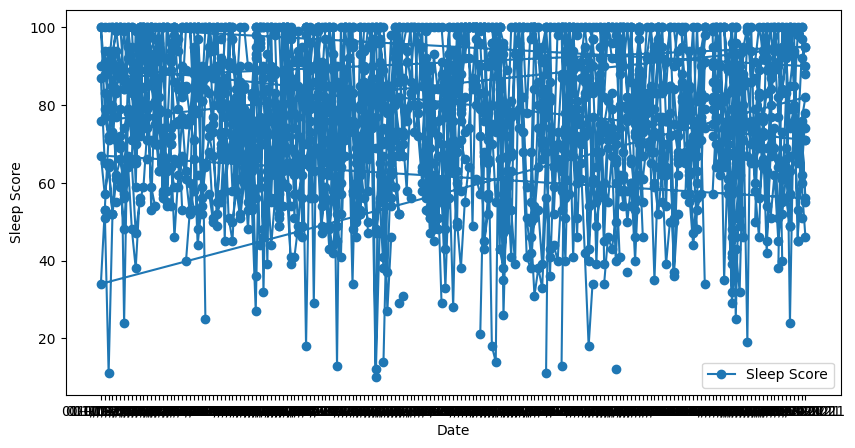

In [26]:
# Plot an example column with missing values
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Sleep.Score'], marker='o', linestyle='-', label='Sleep Score')
plt.xlabel('Date')
plt.ylabel('Sleep Score')
plt.legend()
plt.show()


## KNN fro missing values

In [27]:
num_cols = df.select_dtypes(include=['number']).columns  
cat_cols = df.select_dtypes(exclude=['number']).columns  


imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])


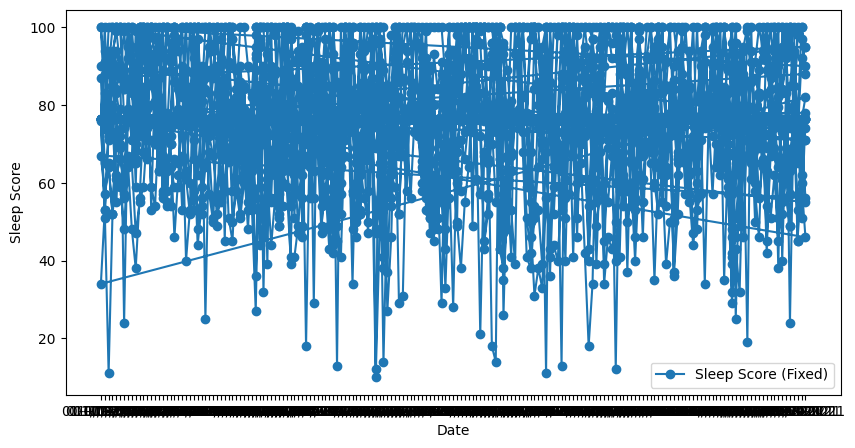

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Sleep.Score'], marker='o', linestyle='-', label='Sleep Score (Fixed)')
plt.xlabel('Date')
plt.ylabel('Sleep Score')
plt.legend()
plt.show()

In [29]:
print(df.isna().sum())  

Athlete                              0
Date                                 0
Day.of.Week                       1124
RHR                                  0
HRV                                  0
Recovery                             0
Sleep.Score                          0
Hours.in.Bed                         0
Hours.of.Sleep                       0
Sleep.Need                           0
Sleep.Efficiency....                 0
Wake.Periods                         0
Sleep.Disturbances                   0
Latency..min.                        0
Cycles                               0
REM.Sleep..hours.                    0
Deep.Sleep..hours.                   0
Light.Sleep..hours.                  0
Awake..hours.                        0
Sleep.Debt..hours.                   0
Sleep.Consistency                    0
Respiratory.Rate                     0
Total.Cycle.Sleep.Time..hours.       0
REM.Percentage                       0
Deep.Sleep.Percentage                0
Restorative.Sleep..hours.

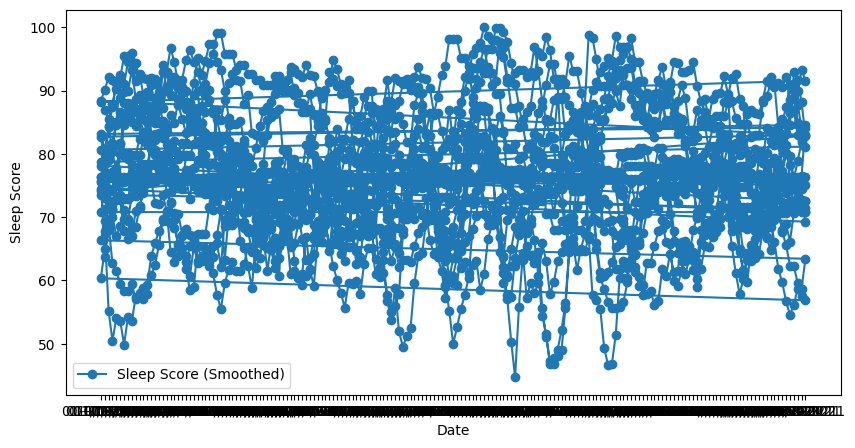

In [30]:
# for noise in data
df['Sleep.Score'] = df['Sleep.Score'].rolling(window=7, min_periods=1).mean() # More Stable Trend -> Increase the Rolling Window
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Sleep.Score'], marker='o', linestyle='-', label='Sleep Score (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Sleep Score')
plt.legend()
plt.show()

In [31]:
df.head()

,Athlete,Date,Day.of.Week,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,...,Awake..hours.,Sleep.Debt..hours.,Sleep.Consistency,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,REM.Percentage,Deep.Sleep.Percentage,Restorative.Sleep..hours.,Restorative.Sleep....,RSI
0,Athlete 1 Bergdorf,01-01-2022,NaN,59.693084,84.065623,59.546189,76.393236,7.780843,6.890545,8.910611,...,0.897279,0.982166,62.58655,16.455005,7.177875,26.373498,17.787481,3.414942,44.139223,0.377742
1,Athlete 1 Bergdorf,01-10-2022,Monday,48.000000,120.000000,58.000000,63.696618,6.360000,5.620000,11.020000,...,0.740000,3.210000,60.20000,11.718800,5.620000,26.300000,22.300000,3.970000,64.600000,0.330000
2,Athlete 1 Bergdorf,01-11-2022,NaN,59.693084,84.065623,59.546189,67.928824,7.780843,6.890545,8.910611,...,0.897279,0.982166,62.58655,16.455005,7.177875,26.373498,17.787481,3.414942,44.139223,0.377742
3,Athlete 1 Bergdorf,01-12-2022,NaN,59.693084,84.065623,59.546189,70.044927,7.780843,6.890545,8.910611,...,0.897279,0.982166,62.58655,16.455005,7.177875,26.373498,17.787481,3.414942,44.139223,0.377742
4,Athlete 1 Bergdorf,1/13/2022,Thursday,53.000000,121.000000,61.000000,67.035941,6.250000,5.560000,10.150000,...,0.700000,1.890000,37.00000,13.007800,5.560000,25.100000,8.600000,2.680000,39.600000,0.364000
